<a href="https://colab.research.google.com/github/SupriyaJagtap56/MachineLearningProg/blob/main/Decision_Tree_29May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file = open("/content/iris_tree.dot","w"),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True,
                filled=True
                )

In [ ]:
import pydot
(graph,) = pydot.graph_from_dot_file("/content/iris_tree.dot")
graph.write_png("/content/iris_tree.png")

Predicting classes for different petal abd sepal length

In [ ]:
arr=['Setosa','versicolor','viginica']

In [ ]:
tree_clf.predict_proba([[7,2.1]])


In [ ]:
arr[tree_clf.predict([[7,2.1]])[0]]

'viginica'

In [ ]:
tree_clf.predict_proba([[2,1.9]])

array([[0.        , 0.02173913, 0.97826087]])

In [ ]:
arr[tree_clf.predict([[2,1.9]])[0]]

'viginica'

In [ ]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
arr[tree_clf.predict([[5,1.5]])[0]]

'versicolor'


Random Forest, Support vector classifier, Logistic regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.15)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),3))

LogisticRegression 0.893
RandomForestClassifier 0.98
SVC 0.987
VotingClassifier 0.98


Bagging Classifier in Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
dec_clf = DecisionTreeClassifier(max_depth = 2)
dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
print(round(accuracy_score(y_test, y_pred),3))

0.967


In [ ]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-2, 2, 500))

In [ ]:
import matplotlib.pyplot as plt

Decision Tree

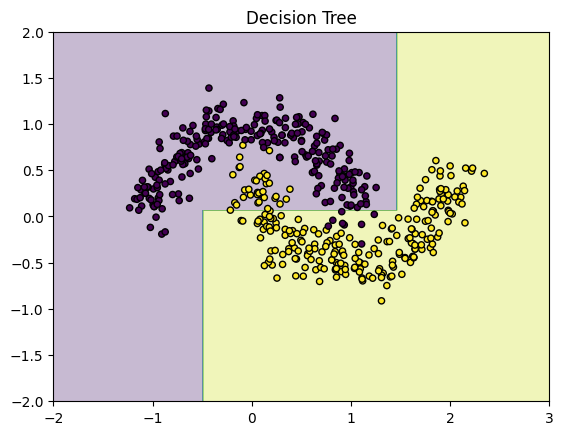

In [ ]:
Z = dec_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Decision Tree')
plt.show()

Bagging with Decision Tree

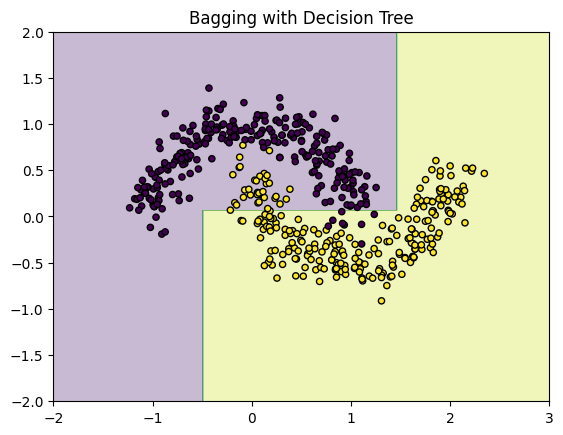

In [ ]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Decision Tree')
plt.show()

Bagging with Decision Tree with OOB (Out Of Bag)

In [ ]:
bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bagg_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [ ]:
bagg_clf.oob_score_

0.9685714285714285

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bagg_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

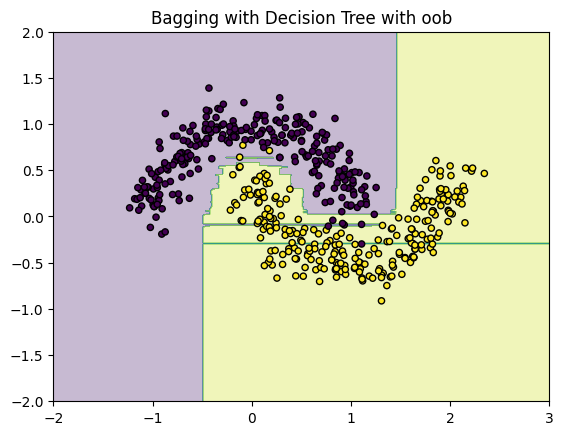

In [ ]:
Z = bagg_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Decision Tree with oob')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

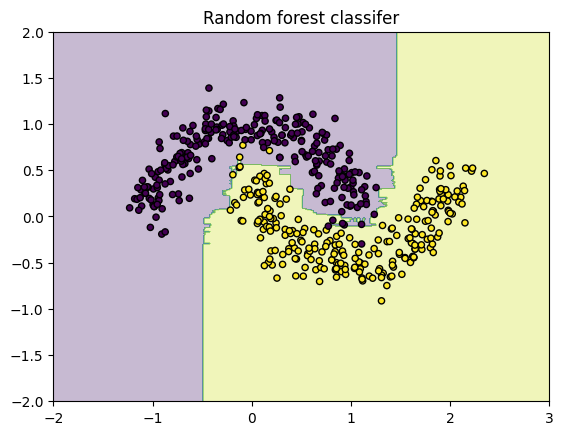

In [ ]:
Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Random forest classifer')
plt.show()

Bagging with Random Forest

In [ ]:
bagging_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

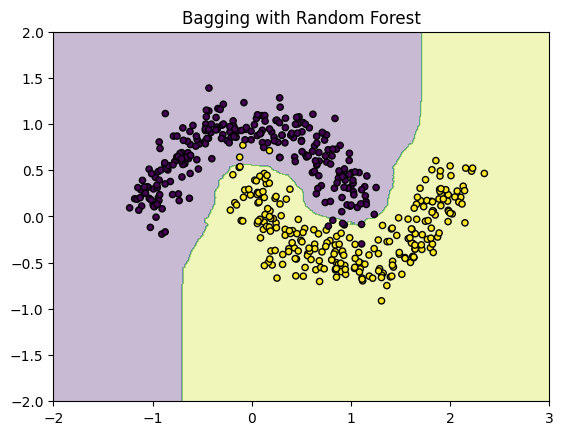

In [ ]:
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Random Forest')
plt.show()

Bagging with random forest with oob

In [ ]:
rnd_oob_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, oob_score=True)
rnd_oob_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1, oob_score=True)

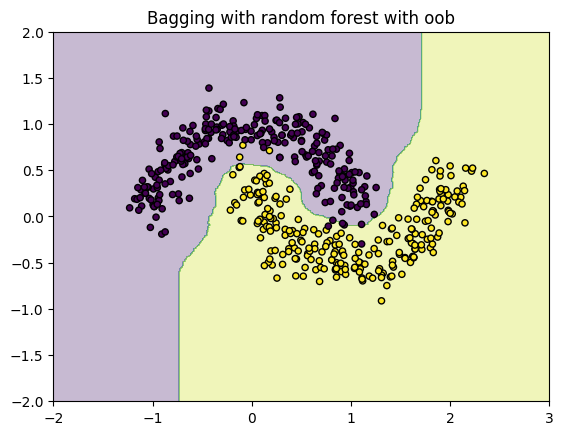

In [ ]:
Z = rnd_oob_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with random forest with oob')
plt.show()